# Why is my code slow?

## Outline

-   Caching, Memoization, and Vectorization

-   Parallel Computing

-   Greedy and Exhaustive Algorithms

-   Faster Implementations versus Faster Algorithms

# Caching, Memoization, and Vectorization

## Caching

-   *Caching* refers to storing things for later use

    -   Your browser probably does by temporarily downloading page
        details on your local disk

    -   Faster, reduces server load

    -   Other examples include 3D rendering and saving common database
        queries

-   However, caching usually takes space in exchange for faster run
    times

-   The *space-time* trade off is a case where an algorithm trades
    increased space usage for faster runtimes

## Memoization

-   *Memoization* refers to storing results of function calls to use for
    later

    -   Specific method of caching

-   This is useful for methods with a lot of repeated computations

-   For instance, in our recursive Fibonacci number function.

-   `fib(12)` is called by `fib(13)`, `fib(14)` etc.

    -   And `fib(3)` is called many many times

-   $F(5) = F(4) + F(3) = F(3) + F(2) + F(2) + F(1)$ Which calculates
    repeated subproblems

## How Memoization Works

-   Since we store the results, each function call is only made once,
    making the time complexity $O(n)$, much better than $O(2^n)$ [1]

-   Memoization can also avoid the maximum recursion depth error because
    the call stack is smaller

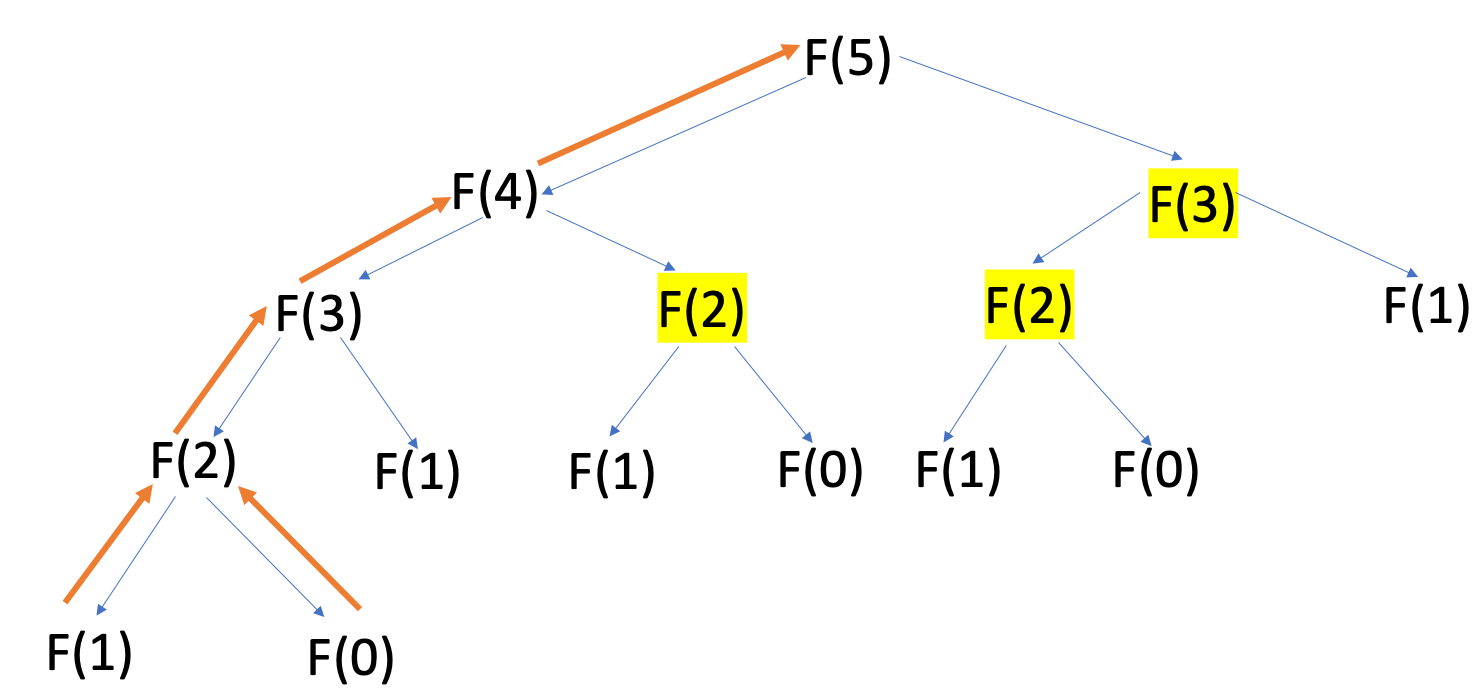

## Memoization Python

[1] From Bhargava chapter 8

In [1]:
cache = {0: 0, 1: 1}

def fib(n):
  if n in cache:
    return cache[n]
  else:
    cache[n] = fib(n - 1) + fib(n - 2)
    return cache[n]

For the base cases, we replace calling `fib(0)` and `fib(1)` by getting
the values from the dictionary

## Memoization Python

-   We can use the `functools` library, which is included in the
    standard library (no pip install needed!)

    -   `functools` does memoization for you!

-   We can use the `@cache` decorator, but the cached dictionary can
    grow to massive sizes

-   Instead, `@lru_cache(maxsize = n)` uses the LRU (least recently
    used) `n` computations

-   Alternatively, we can use `joblib` to store the memoized results in
    a file

## Memoization Python

In [2]:
from functools import lru_cache

@lru_cache(maxsize=10)
def fib_rec(n):
  if n == 0 or n == 1:
    return n
  else:
    return fib_rec(n-1) + fib_rec(n-2)

## Vectorized Operations

-   *Vectorization* is a technique of implementing array operations
    without for loops

-   We use functions defined by various modules that are highly
    optimized for the specific problem

-   NumPy provides a lot of functions that vectorized and are faster
    than for loops

    -   Array add/subtract/multiply/divide by scalar

    -   Sum of array

    -   Max/min of array

-   Keep this in mind for some ML processes that are iterative, such as
    gradient descent

## Why Vectorized Operations Work

-   Python is an interpreted language. There is no compiler and the
    languages are dynamic

-   C language, for instance, makes optimization at the compiler level
    (before execution) to speed up your code

-   Thus, NumPy implements arrays in C, which speeds things up

-   The other reason vectorization works in because of parallelization

# Parallel Computing

## Parallelization

Compare the following codes. What are their run times?

In [3]:
def fib(n):
  if n <= 1:
    return n
  else:
    return fib(n - 1) + fib(n - 2)

## Parallelization

In [4]:
import numpy

def add_one(n, x):
  y = np.zeros(n)
  for i in range(n):
    y[i] = x[i] + 1
        
  return y

## Parallelization

-   Both are $O(n)$, but the second code chunk can be done in *parallel*
    because the $n$ computations are independent.

-   Fibonacci depends on the previous two values

-   The requirements for code to the parallelized and vectorized are
    similar, but not the same

-   The Numba library can help will parallelizing your code

-   Note parallel means the process takes place on one machine, but
    *distributed* means the computation is shared across many machines

# Greedy and Exhaustive Algorithms

## Greedy Approach (literally)

-   Let’s revisit the knapsack problem, taking a different approach.

-   The items are:

    -   Stereo: \$3000, 4 kg

    -   Laptop: \$2000, 3 kg

    -   Guitar: \$1500, 1 kg

-   If we follow the rule “get the most valuable item, then get second
    most valuable etc.” we would make \$3000 by taking the stereo, which
    isn’t the optimal \$3500

-   A *greedy algorithm* picks the optimal move at each step, which
    hopefully leads to the overall optimal solution

    -   But it finds the solution in $O(n)$ time

## Greedy Apporach

-   Let’s say you could take fractions of an item and we tried the
    greedy approach

    -   Peanuts: \$7/kg

    -   Rice: \$5/kg

    -   Tea: \$12/kg

-   We would take tea until it runs out, followed by peanuts and rice.
    This is the optimal solution in $O(n)$ time!

## Classroom Scheduling Problem

-   Suppose we want to hold as many classes in a classroom as possible
    [1]

| Class        | Start   | End     |
|--------------|---------|---------|
| Yoga         | 9AM     | 10AM    |
| Music Theory | 9:30AM  | 11AM    |
| Painting     | 10AM    | 11AM    |
| Algorithms   | 10:30AM | 11:30AM |
| Calculus     | 11AM    | 12PM    |

2 Minutes: write down a greedy algorithm to solve this problem

## Classroom Scheduling Problem

Algorithm

1.  Pick the class that ends the soonest. This is the first class you’ll
    hold in this classroom

2.  Now, you have to pick a class that starts after the first class.
    Again, pick the class that ends the soonest. This is the second
    class you’ll hold

3.  Repeat the second step

This not only produces the correct solution but also does so in $O(n)$
time, for $n$ classes!

## Classroom Scheduling Problem

-   An alternative algorithm is the *exhaustive approach*

    -   We try every combination of classes. At the end, we see which
        solution fits the most classes

    -   We try every combination of items to steal. At the end, we see
        which solution has the most value

-   While brute forcing might sound always unnecessary, there are cases
    where it is needed to get the optimal solution

    -   When performing subset selection for regression or decision
        tree, we can’t guarantee the variables are uncorrelated. So
        forward/backward stepwise selection isn’t guaranteed to produce
        the best outcome
    -   More on this in a few slides

-   2 minutes: what is the time complexity of best subset selection?

## Greedy Approximation Algorithms

-   Problems involving finding the best subset of a variable to max/min
    an objective value are generalized as the problem of finding the
    best *power set*.

    -   There are $2^n$ power sets, which becomes impossible to
        calculate past $n=100$ (depending on the constants)

-   *Approximation algorithms* are judged by how fast they are and how
    close they are to the optimal solution

    -   Forward/backwards stepwise selection is an approximation
        algorithm to best subset selection

## N-P Complete Problems

-   In the power set problem, we need to brute force all combinations
    and test them. Such problems are called *N-P Complete*

    -   A lot of smart people think it’s not possible to solve these
        with efficient algorithms

-   It’s hard to tell if a problem is N-P complete

    -   Finding the shortest path between two points is N-P complete
        (travelling salesman)

    -   But the knapsack problem isn’t N-P complete because we can solve
        it using dynamic programming

## Live Coding

You are given an integer array prices where `prices[i]` is the price of
a given stock on the $i$th day.On each day, you may decide to buy and/or
sell the stock. You can only hold at most one share of the stock at any
time. However, you can buy it then immediately sell it on the same day.

Find and return the maximum profit you can achieve.

[1] From Bhargava chapter 8

In [5]:
# INPUT
prices = [7,1,5,3,6,4]
# OUTPUT
7

From
[leetcode](https://leetcode.com/problems/best-time-to-buy-and-sell-stock-ii/description/)

# Faster Implementations versus Faster Algorithms

## Faster Implementations versus Faster Algorithms

-   There are two ways we speed up our code

    -   Use a faster algorithm, such as dynamic programming instead of
        brute force. Algorithms are concerned with the approach to the
        problem

    -   Use a faster implementation, such as vectorization instead of
        loops

-   It is useful to think about these separately when developing a
    programming, then combining them to create a super-fast approach!

# Recommended Problems and References

## Recommended Problems and Readings

-   Cormen: Chapter 34 on NP-Completeness (highly optional)

-   Bhargava: Chapter 8 exercises

    -   8.1 - 8.8

-   Vectorize the second code chunk in the Parallelization section

-   [Find the longest palindrome from a
    string](https://leetcode.com/problems/longest-palindrome/) Hint: use
    a greedy alogrithm

-   [Computing Pascal’s
    triangle](https://leetcode.com/problems/pascals-triangle/) Hint: use
    dynamic programming

## References

-   Bhargava, A. Y. (2016). *Grokking algorithms: An illustrated guide
    for programmers and other curious people.* Manning. Chapter 1.

-   Cormen, T. H. (Ed.). (2009). *Introduction to algorithms* (3rd ed).
    MIT Press. Chapter 1 and 3.